# How does a country's GDP, emmissons, and development status relate to its average annual temperature?

## Project 1

### Introduction

Climate change is a global phenomenon that is caused by an increase in the concentration of greenhouse gases (GHGs) in the atmosphere, primarily carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O), due to human activities such as burning fossil fuels, deforestation, and agriculture. The rise in global temperatures has significant impacts on ecosystems and human societies, including more frequent and severe weather events, sea level rise, and changes in precipitation patterns (Earth Science Communications Team). 

Studies have demonstrated that human activities are the primary driver of global warming, and that the increase in GHG emissions is strongly linked to the rise in global temperatures (Rosa and Dietz). However, the relationship between rising emissions and GDP of countries with average annual temperatures is complex and not well understood. Some researchers suggest that economic growth and emissions are positively correlated, and that higher emissions lead to higher temperatures (Knight and Schor). For example, countries such as China, whose GDP has been growing rapidly over the past few decades, are also growing in GHG emissions (Christopher L. Weber a et al.). This research paper seeks to explore the relationship between rising emissions and GDP of countries with their average annual temperatures, in order to provide insights into the potential impacts of economic growth on the Earth's climate system.

The dependent variable in this study is average annual temperature and the independent variables are GDP and annual emissions (broken down into Co2, Coal Co2, Cement Co2, Oil Co2, Gas Co2, Methane and Nitrous Oxide). 

Two datasets were combined to form the primary dataset in this study:  "Climate Change: Earth Surface Temperature Data" (Earth) and "Our World in Data CO2 and Greenhouse Gas Emissions database" (Ritchie et al.). The sample from the Earth Surface Temperature dataset includes several subsets, however, for the purpose of this study only the "Global Land Temperature By Country" data was used. The Earth Surface Temperature dataset includes the average monthly temperature for 243 countries from 1744-2013. The Our World in Data (OWID) sample contains data on annual Co2 (and Co2 broken down by contributions from cement, oil, gas and coal), methane and nitrous oxide emissions, as well as annual GDP by country from 1990-2018. 

Findings from the study include a weak positive correlation between average temperature with both GDP and Co2 emissions, as well as a weak negative correlation between development status and average annual temperature (see project 2).

### Data Cleaning/Loading

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
GLT_City_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\archive\\GlobalLandTemperaturesByCountry.csv"
Emmisions_URL = "C:\\Users\\micha\\OneDrive\\Michael\\UofT Year 4\\ECO225 - Big Data Tools for Economists\\Project Data\\data.csv"

In [68]:
#GLT -> Global Land Temperature dataset from Kaggle
#E -> Emmissons dataset from OWID
GLT = pd.read_csv(GLT_City_URL).drop(labels = 'AverageTemperatureUncertainty', axis = 1)
E = pd.read_csv(Emmisions_URL)
GLT[GLT['Country'] == 'Afghanistan']

,dt,AverageTemperature,Country
3239,1838-04-01,13.008,Afghanistan
3240,1838-05-01,NaN,Afghanistan
3241,1838-06-01,23.950,Afghanistan
3242,1838-07-01,26.877,Afghanistan
3243,1838-08-01,24.938,Afghanistan
...,...,...,...
5340,2013-05-01,21.355,Afghanistan
5341,2013-06-01,26.879,Afghanistan
5342,2013-07-01,28.205,Afghanistan
5343,2013-08-01,26.031,Afghanistan


**Combing the datasets:** To combine these two data sets, several operations must be performed: 

Missing values need to be dropped, column titles must use the same naming convention to be merged, and the final dataset should contain only matching data from shared time-frames.

In [5]:
#Fixiing column names and dropping missing values
E.rename(columns = {'country':'Country', 'year':'Year'}, inplace = True)
GLT.rename(columns = {'dt':'Year'}, inplace = True)
GLT = GLT.dropna() 
#Generalize monthly inputs by year for merging
GLT['Year'] = GLT['Year'].str[0:4].astype(int)

In [6]:
#Merging data
data = E.merge(GLT, on=['Country','Year'])
index_names = data[data['Country'] == 'United Arab Emirates'].index
data.drop(index_names, inplace = True)

In [48]:
data_annual = data.drop(labels = 'AverageTemperature', axis = 1).drop_duplicates()
#cy -> country year
cy = data_annual[['Country','Year']]
def average(lst):
    return sum(lst)/len(lst)
#dcy -> Data, Country, Years
dcy = data.groupby(['Country','Year'])
#cyt -> country year temperature
avg = []
for country in cy['Country'].unique():
    for year in cy['Year'].unique():
        avg.append(average(dcy.get_group((country, year))['AverageTemperature']))
data_annual['Avg_Annual_Temp'] = avg

In [70]:
glt_annual =  GLT.copy().dropna()
#gltcy -> country year
gltcy = glt_annual[['Country','dt']]
def average(lst):
    return sum(lst)/len(lst)
#dcy -> Data, Country, Years
gcy = GLT.groupby(['Country','dt'])
#cyt -> country year temperature
avg = []
for country in gltcy['Country'].unique():
    for year in gltcy['dt'].unique()[1::]:
        avg.append(average(gcy.get_group((country, year))['AverageTemperature']))
glt_annual['Avg_Annual_Temp'] = avg

KeyError: ('Afghanistan', '1744-04-01')

In [51]:
gcy.get_group(('Afghanistan', '1743-11-01'))

KeyError: ('Afghanistan', '1743-11-01')

### Summary Statistics Tables

In [8]:
sum_stats = data_annual.drop(labels = 'Year', axis = 1).describe()
sum_stats.rename(columns = {'gdp':'GDP', 'cement_co2': 'Co2 from Cement', 
                            'coal_co2': 'Co2 from Coal', 'gas_co2': 'Co2 from Gas',
                           'methane': 'Methane', 'nitrous_oxide': 'Nitrous Oxide',
                           'oil_co2': 'Co2 from Oil', 'Avg_Annual_Temp': 'Average Annual Temperature',
                           'co2': 'Carbon Dioxide'}, inplace = True)
sum_stats

,GDP,Co2 from Cement,Carbon Dioxide,Co2 from Coal,Co2 from Gas,Methane,Nitrous Oxide,Co2 from Oil,Average Annual Temperature
count,3.600000e+03,3510.000000,3600.000000,3599.000000,3599.00000,3600.000000,3600.000000,3599.000000,3600.000000
mean,4.329168e+11,5.828972,174.307535,70.052890,32.51188,46.027850,16.523408,62.548410,18.661510
std,1.401533e+12,34.462331,686.165587,397.784658,120.09953,117.744049,44.425038,217.379003,8.707836
min,2.757300e+08,0.000000,0.000000,0.000000,0.00000,0.040000,0.000000,0.059000,-19.000417
25%,1.638855e+10,0.113000,2.837750,0.000000,0.00000,4.177500,1.440000,1.889000,11.235104
50%,5.156510e+10,0.618000,17.193000,0.451000,1.71400,11.215000,4.715000,8.849000,21.666500
75%,2.631512e+11,2.766500,76.755000,14.101000,18.23750,35.542500,13.635000,36.433000,26.134833
max,1.610840e+13,748.323000,9956.309000,7493.454000,1410.36700,1147.210000,522.800000,2644.237000,30.744750


#### **Explanation:** Interpreting Summary Statistics

**Average Annual Temperature - Dependent Variable:** From this table we can observe the total range of average annual temperatures taken in every country in the dataset from 1990-2013. The lowest annual temperature in the dataset is -19 degrees Celsius and the highest is 30.7 degrees Celsius. The mean is 18.66 degrees Celsius. This particular snapshot of the data doesn't tell us too much as countries in Northern Europe are expected to have drastically different average temperatures from countries in Central Africa, for example. Furthermore, without the time trend, we cannot study how temperatures changed, whether they increased or decreased, and by how much.

**GDP - Independent Variable:** The summary statistics for GDP gives us a bit more information than Average Temperature. This is because we can observe the range of economic output of countries in our dataset in Real USD in 2011 dollars (see documentation for OWID dataset). The lowest recorded GDP is ~276 Million and the highest recorded GDP is ~16.1 Trillion. The mean level of GDP ~429 Million but standard deviation is ~1.4 Trillion so there is a high degree of variance in the sample.

**Emissions - Independent Variable:** For all emissions in the sample data, the lowest recorded emission per country per year is approx 0, meaning that some countries in the sample emitted no greenhouse gasses in any form in a given year. The mean for each demonstrates the average annual emission of countries in this dataset between 1990-2013 in tons. We can observe from this table that Co2 takes the majority share of greenhouse gas emissions, and, amongst C02 emissions, coal is the highest contributor.

### Figures and Graphs

Of the set of 243 countries in the dataset, a subset of 6 representative countries were chosen for the figures below to make graphical interpretations more clear to the reader. The 6 countries cover a representative from North America, South America, Europe, Asia, South Asia and the Middle East and have a wide range of GDP and emissions data.

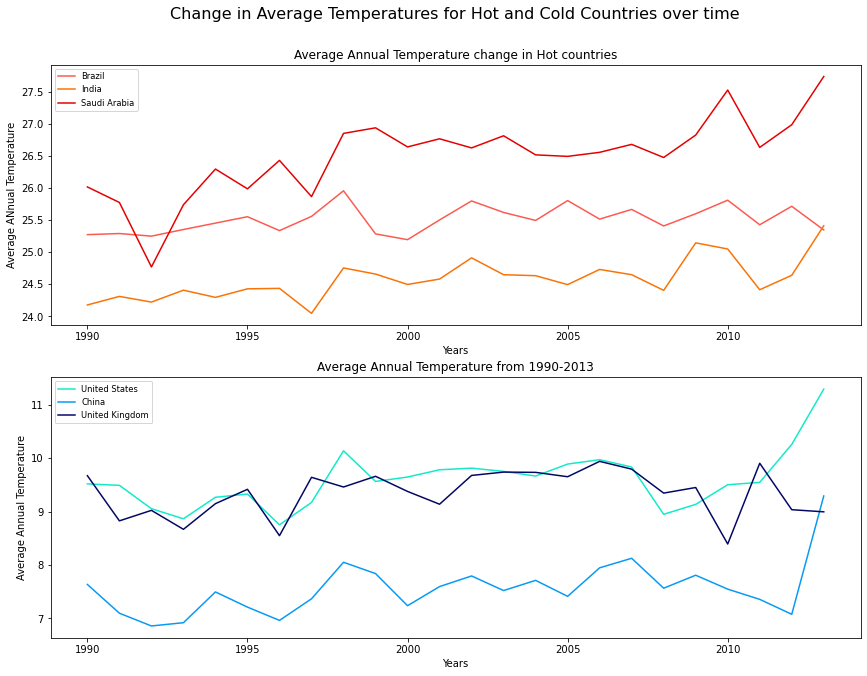

In [38]:
#Countries
figure, axis = plt.subplots(2)
C = ['United States', 'China', 'United Kingdom', 'Brazil', 'India', 'Saudi Arabia']
C1 = ['Brazil', 'India', 'Saudi Arabia']
C2 = ['United States', 'China', 'United Kingdom']
figure.suptitle("Change in Average Temperatures for Hot and Cold Countries over time",
                fontsize=16, x = '1.06', y = '2.2') 
hcolor = ['#FC5A50', '#F97306', '#E50000']
tick = 0
for country in C1:
    axis[0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'], 
                 color = hcolor[tick], label = country)
    tick += 1
    
t = 0
ccolor = ['#12EAC9', '#069AF3', '#030764']
for country in C2:
    axis[1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'], 
                 color = ccolor[t], label = country)
    t += 1
# set axis lables
axis[0].set_xlabel("Years")
axis[1].set_xlabel("Years")
axis[0].set_ylabel("Average ANnual Temperature")
axis[1].set_ylabel("Average Annual Temperature")
axis[0].set_title('Average Annual Temperature change in Hot countries')
axis[1].set_title('Average Annual Temperature change in Cold countries')
# set chart title
plt.title("Average Annual Temperature from 1990-2013")
axis[0].legend(loc = 'best', fontsize = 'small')
axis[1].legend(loc = 'best', fontsize = 'small')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

The figure above shows how average annual temperatures in the 6 representative countries change over time. Countries in very different geographies have different average temepratures, so for the sake of clarity the 6 countries were further broken down into hot and cold countries. In this small timeframe, it's hard to observe a significant change however, in the United States, Saudia Arabia and China specifically, average annual temperatures have increased more rapidly than other countries in the last few years of data.

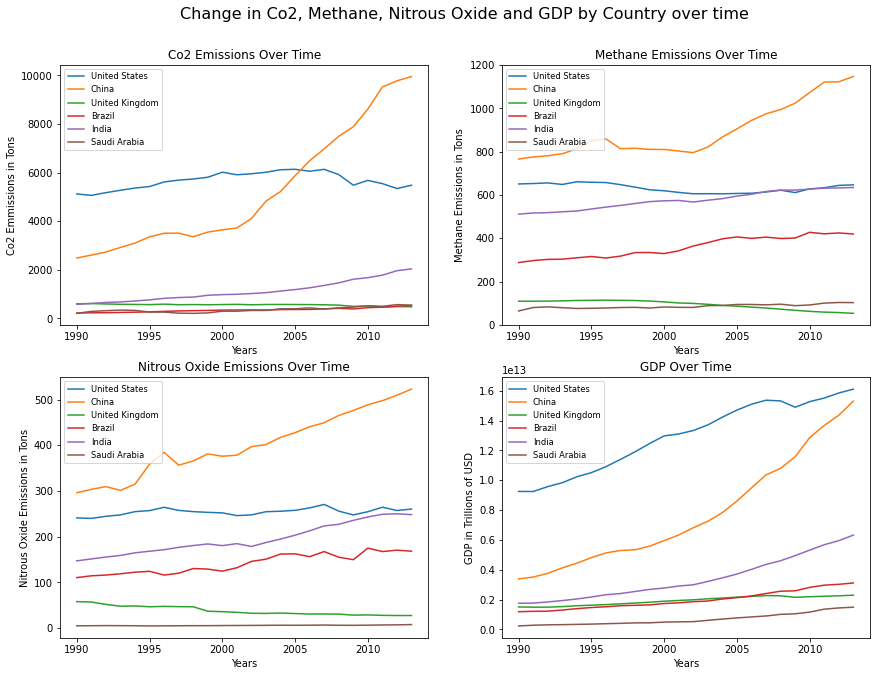

In [13]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Change in Co2, Methane, Nitrous Oxide and GDP by Country over time",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['co2'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['methane'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['nitrous_oxide'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gdp'], label = country)
axis[0, 0].set_title('Co2 Emissions Over Time')
axis[0, 1].set_title('Methane Emissions Over Time')
axis[1, 0].set_title('Nitrous Oxide Emissions Over Time')
axis[1, 1].set_title('GDP Over Time')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Years')
axis[0, 1].set_xlabel('Years')
axis[1, 0].set_xlabel('Years')
axis[1, 1].set_xlabel('Years')
axis[0, 0].set_ylabel('Co2 Emmissions in Tons')
axis[0, 1].set_ylabel('Methane Emissions in Tons')
axis[1, 0].set_ylabel('Nitrous Oxide Emissions in Tons')
axis[1, 1].set_ylabel('GDP in Trillions of USD')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These graphs show how emissions and GDP change for each of the representative countries over the 23 years included in this dataset. Notably, China has had the most explosive growth for both emissions and GDP while the United States has managed to slightly decrease Co2 and Methane emissions while also growing in GDP. India has the second highest emissions growth and also the second fastest growing GDP.

From these data, it's possible to infer that countries whose GDP grows quickly also have higher emissions due to rising industrialization. The United States may be an exception because most of the growth occurring in the United States is derived from information economies (Jorgenson, Dale W., et al.) rather than production economies like in China and India. 

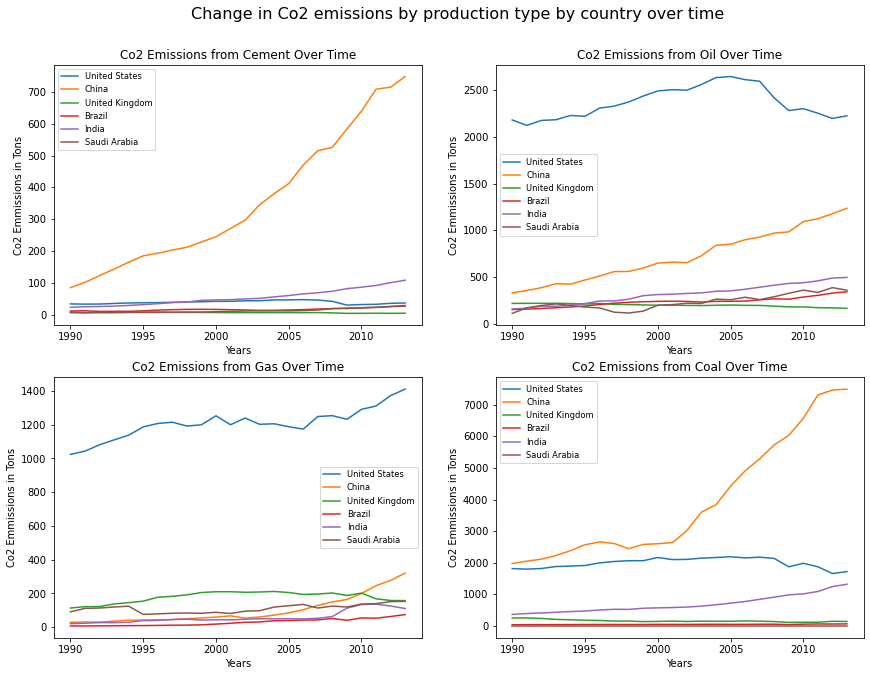

In [14]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Change in Co2 emissions by production type by country over time",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    axis[0, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['cement_co2'], label = country)
# For Methane
for country in C:
    axis[0, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['oil_co2'], label = country) 
# For Nitrous Oxide
for country in C:
    axis[1, 0].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['gas_co2'], label = country)
# For GDP
for country in C:
    axis[1, 1].plot(cy['Year'].unique(),data_annual[data_annual['Country'] == country]['coal_co2'], label = country)
axis[0, 0].set_title('Co2 Emissions from Cement Over Time')
axis[0, 1].set_title('Co2 Emissions from Oil Over Time')
axis[1, 0].set_title('Co2 Emissions from Gas Over Time')
axis[1, 1].set_title('Co2 Emissions from Coal Over Time')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Years')
axis[0, 1].set_xlabel('Years')
axis[1, 0].set_xlabel('Years')
axis[1, 1].set_xlabel('Years')
axis[0, 0].set_ylabel('Co2 Emmissions in Tons')
axis[0, 1].set_ylabel('Co2 Emmissions in Tons')
axis[1, 0].set_ylabel('Co2 Emmissions in Tons')
axis[1, 1].set_ylabel('Co2 Emmissions in Tons')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These graphs show how different countries use the subsets of overall Co2 emitting resources differently over time. By observing the Y axis of each graph, it's possible to gauge which resource contributes most heavily to overall Co2 emissions. For example, coal contributes to Co2 emissions on the scale of thousands of tons of Co2, while cement contributes to Co2 emissions on the scale of only hundreds of tons of Co2. 

China, whose Co2 emissions grew the most of these 6 countries, is emitting substantially more Co2 from cement and coal than other countries, but relatively little emissions derived from oil and gas. This makes sense as the increased industrialization and demand for production relates to the usage of coal and cement because of the need to build new factories and infrastructure. Conversely, the United States emits Co2 primarily from oil and gas and relatively little from cement and coal. The higher contribution of coal to overall Co2 emissions relative to other resources explains why countries such as China and India are more rapidly increasing overall Co2 emissions than the United States.

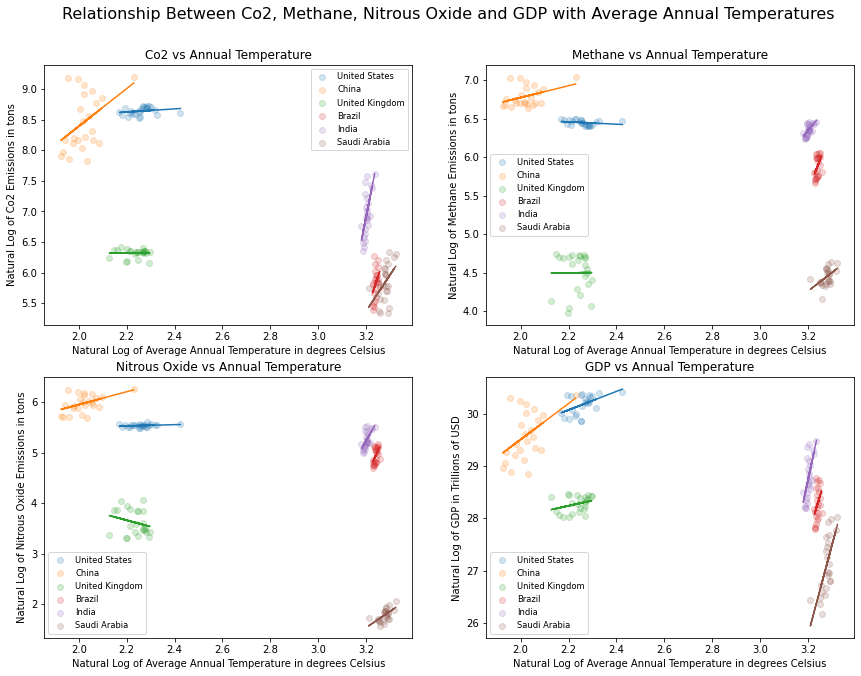

In [15]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
figure.suptitle("Relationship Between Co2, Methane, Nitrous Oxide and GDP with Average Annual Temperatures",
                fontsize=16, x = '1.06', y = '2.2') 
# For Co2
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['co2'])
    axis[0, 0].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[0, 0].plot(x, m*x+b)
# For Methane
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['methane'])
    axis[0, 1].scatter(x, y, label = country, alpha = 0.2) 
    m, b = np.polyfit(x, y, 1)
    axis[0, 1].plot(x, m*x+b)
# For Nitrous Oxide
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['nitrous_oxide'])
    axis[1, 0].scatter(x, y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1, 0].plot(x, m*x+b)
# For GDP
for country in C:
    x = np.log(data_annual[data_annual['Country'] == country]['Avg_Annual_Temp'])
    y = np.log(data_annual[data_annual['Country'] == country]['gdp'])
    axis[1, 1].scatter(x, y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1, 1].plot(x, m*x+b)
    
axis[0, 0].set_title('Co2 vs Annual Temperature')
axis[0, 1].set_title('Methane vs Annual Temperature')
axis[1, 0].set_title('Nitrous Oxide vs Annual Temperature')
axis[1, 1].set_title('GDP vs Annual Temperature')
axis[0, 0].legend(loc = 'best', fontsize = 'small')
axis[0, 1].legend(loc = 'best', fontsize = 'small')
axis[1, 0].legend(loc = 'best', fontsize = 'small')
axis[1, 1].legend(loc = 'best', fontsize = 'small')
axis[0, 0].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[0, 1].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[1, 0].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[1, 1].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[0, 0].set_ylabel('Natural Log of Co2 Emissions in tons')
axis[0, 1].set_ylabel('Natural Log of Methane Emissions in tons')
axis[1, 0].set_ylabel('Natural Log of Nitrous Oxide Emissions in tons')
axis[1, 1].set_ylabel('Natural Log of GDP in Trillions of USD')
plt.subplots_adjust(bottom=0.01, right=2, top=2)
plt.show()

These scatterplots and regressions lines show how the percentage change in Co2, Methane, Nitrous Oxide and GDP explain the percentage change in average annual temperatures. It's important to note that different countries have wildly different regression lines, so a general interpretation for all countries is not possible to derive from these data.

Some notable observations include the weak positive correlation between Co2 and GDP with annual temperature for China. China had one of the highest levels of overall emissions and GDP, so it's possible that countries with higher GDP and overall Co2 emissions have higher correlations between the percentage change in these variables with average annual temperatures. In other words, it's possible that we won't find a very explanatory relationship between emissions and GDP with average annual temperatures in countries with low overall GDP and emissions.

Saudi Arabia is another country that displays weak positive correlations between average annual temperature and all four of the independent variables above. Unlike some of the other countries, however, Saudi Arabia has a stronger relationship between average annual temepratures and the two other GHG's (methane and nitrous oxide).

The two most developed countries in these graphs, the United States and the United Kingdom, have the flattest regression lines in all of the figures. In some cases, we can even observe a weak negative correlation between nitrous oxide emissions and average annual temepratures, like in the case of the United Kingdom. However, the overall scatter for these plots is too evenly distributed to interpret the relationship in any meaningful way. Instead, the appropriate interpretation is that there is no observable relationship between GHG emissions and local average annual temepratures for either the United States or the United Kingdom.

In general, nitrous oxide and methane seem to have less explanatory relationships with average annual temperature than the Co2 and GDP variables. This could mean that a country's methane and nitrous oxide emissions have a weaker correlation with their local average annual temperature change than their Co2 emissions and GDP. 

## Project 2

### The Message

The evidence is clear that the globe as a whole is warming as a result of human activities and GHG emissions (Earth Science Communications Team). However, it's not clear to what degree a countries individual actions affect their local temperature. In an attempt to resolve this uncertainty, this paper looks to analyze the relationship between several independent variables such as emissions, GDP and development status with average annual temepratures. 

From the figures shown above, it seems as though countries with rapidly expanding economies like China, India and Saudi Arabia are growing at the cost of their local environments. Unlike more developed countries like the United States and the United Kingdom, who can afford to rely on diverse energy production methods, these developing countries are burning more coal, growing faster and heating up more quickly than ever before. This may be because the United States and the United Kingdom already passed their own period of rapid economic expansion (and GHG emissions) in the early 20th century, prior to the time frame included in these data.

### Merging with a new dataset

To test this hypothesis, we will group the countries in this dataset into 3 categories: developed economies, economies in transition and developing economies (WESP). Note that this dataset was reported on multiple tables in a PDF file so each development status was added manually. We will then create a new variable for the total change in average annual temperatures from 1990-2013 and plot a distribution of total temperature changes for each of the three groups.

In [16]:
#dtc -> data temperature change
dtc = pd.DataFrame(data = {
    'Country': cy['Country'].unique()})
di = {
    'Austria': 'Developed',
    'Russia': 'Developing',
    'Belgium': 'Developed',
    'Denmark': 'Developed',
    'Finland': 'Developed',
    'France': 'Developed',
    'Germany': 'Developed',
    'Greece': 'Developed',
    'Ireland': 'Developed',
    'Italy': 'Developed',
    'Luxembourg': 'Developed',
    'Netherlands': 'Developed',
    'Portugal': 'Developed',
    'Spain': 'Developed',
    'Sweden': 'Developed',
    'United Kingdom': 'Developed',
    'Bulgaria': 'Developed',
    'Croatia': 'Developed',
    'Cyprus': 'Developed',
    'Czech Republic': 'Developed',
    'Estonia': 'Developed',
    'Hungary': 'Developed',
    'Latvia': 'Developed',
    'Lithuania': 'Developed',
    'Malta': 'Developed',
    'Poland': 'Developed',
    'Romania': 'Developed',
    'Slovakia': 'Developed',
    'Slovenia': 'Developed',
    'Iceland': 'Developed', 
    'Norway': 'Developed',
    'Switzerland': 'Developed',
    'Australia': 'Developed',
    'Canada': 'Developed',
    'Japan': 'Developed',
    'New Zealand': 'Developed',
    'United States': 'Developed',
    'Albania': 'Transitioning',
    'Bosnia and Herzegovina': 'Transitioning',
    'Montenegro': 'Transitioning',
    'Serbia': 'Transitioning', 
    'Armenia': 'Transitioning',
    'Azerbaijan': 'Transitioning',
    'Belarus': 'Transitioning', 
    'Georgiaa': 'Transitioning',
    'Kazakhstan': 'Transitioning', 
    'Kyrgyzstan': 'Transitioning', 
    'Republic of Moldova': 'Transitioning', 
    'Tajikistan': 'Transitioning',
    'Turkmenistan': 'Transitioning', 
    'Ukraine': 'Transitioning', 
    'Uzbekistan': 'Transitioning', 
    'Algeria': 'Developing', 
    'Egypt': 'Developing', 
    'Libyab': 'Developing', 
    'Mauritania': 'Developing',
    'Morocco': 'Developing',
    'Sudan': 'Developing', 
    'Tunisia': 'Developing', 
    'Cameroon': 'Developing',
    'Central African Republic': 'Developing',
    'Chad': 'Developing',
    'Congo': 'Developing', 
    'Equatorial Guinea': 'Developing', 
    'Gabon': 'Developing', 
    'Sao Tome and Prinicipe': 'Developing',
    'Burundi': 'Developing', 
    'Comoros': 'Developing', 
    'Democratic Republic of the Congo': 'Developing',
    'Djibouti': 'Developing', 
    'Eritrea': 'Developing', 'Ethiopia': 'Developing',
    'Kenya': 'Developing',
    'Madagascar': 'Developing',
    'Rwanda': 'Developing',
    'Somalia': 'Developing',
    'Uganda': 'Developing',
    'United Republic of Tanzania': 'Developing',
    'Angola': 'Developing',
    'Botswana': 'Developing',
    'Lesotho': 'Developing',
    'Malawi': 'Developing',
    'Mauritius': 'Developing',
    'Mozambique': 'Developing',
    'Namibia': 'Developing',
    'South Africa': 'Developing',
    'Zambia': 'Developing',
    'Zimbabwe': 'Developing',
    'Benin': 'Developing',
    'Burkina Faso': 'Developing',
    'Cabo Verde': 'Developing',
    'Côte d’Ivoire': 'Developing',
    'Gambia': 'Developing',
    'Ghana': 'Developing',
    'Guinea': 'Developing',
    'Guinea-Bissau': 'Developing',
    'Liberia': 'Developing',
    'Mali': 'Developing',
    'Niger': 'Developing',
    'Nigeria': 'Developing',
    'Senegal': 'Developing',
    'Sierra Leone': 'Developing',
    'Togo': 'Developing',
    'Brunei Darussalam': 'Developing',
    'China': 'Developing',
    'Hong Kong': 'Developing',
    'Indonesia': 'Developing',
    'Malaysia': 'Developing',
    'Myanmar': 'Developing',
    'Papua New Guinea': 'Developing',
    'Philippines': 'Developing',
    'Republic of Korea': 'Developing',
    'Singapore': 'Developing',
    'Taiwan Province of China': 'Developing',
    'Thailand': 'Developing',
    'Vietnam': 'Developing',
    'Bangladesh': 'Developing',
    'India': 'Developing',
    'Iran': 'Developing',
    'Nepal': 'Developing',
    'Pakistan': 'Developing',
    'Sri Lanka': 'Developing',
    'Bahrain': 'Developing',
    'Iraq': 'Developing',
    'Israel': 'Developing',
    'Jordan': 'Developing',
    'Kuwait': 'Developing',
    'Lebanon': 'Developing',
    'Oman': 'Developing',
    'Qatar': 'Developing',
    'Saudi Arabia': 'Developing',
    'Syrian Arab Repuplic': 'Developing',
    'Turkey': 'Developing',
    'United Arab Emirates': 'Developing',
    'Yemen': 'Developing',
    'Barbados': 'Developing',
    'Cuba': 'Developing',
    'Dominican Republic': 'Developing',
    'Guyana': 'Developing',
    'Haiti': 'Developing',
    'Jamaica': 'Developing',
    'Trinidad and Tobago': 'Developing',
    'Costa Rica': 'Developing',
    'El Salvador': 'Developing',
    'Guatemala': 'Developing',
    'Honduras': 'Developing',
    'Mexico': 'Developing',
    'Nicaragua': 'Developing',
    'Panama': 'Developing',
    'Argentina': 'Developing',
    'Bolivia': 'Developing',
    'Brazil': 'Developing',
    'Chile': 'Developing',
    'Colombia': 'Developing',
    'Ecuador': 'Developing',
    'Paraguay': 'Developing',
    'Peru': 'Developing',
    'Uruguay': 'Developing',
    'Venezuela': 'Developing',
    }
development_index = pd.DataFrame(data = {'Country': di.keys(),'Development Status': di.values()})
master_data = pd.merge(dtc, development_index, on = 'Country', how = 'inner') 

In [17]:
#Creating Temperture Change Variable
Temp_change = []
#dyt -> data year temp
dyt = data_annual.groupby(['Country','Year'])
for country in master_data['Country']:
    T1 = list(dyt.get_group((country, 2013))['Avg_Annual_Temp'])[0]
    T2 = list(dyt.get_group((country, 1990))['Avg_Annual_Temp'])[0]
    Temp_change.append(T1 - T2)
master_data['Temperature Change'] = Temp_change

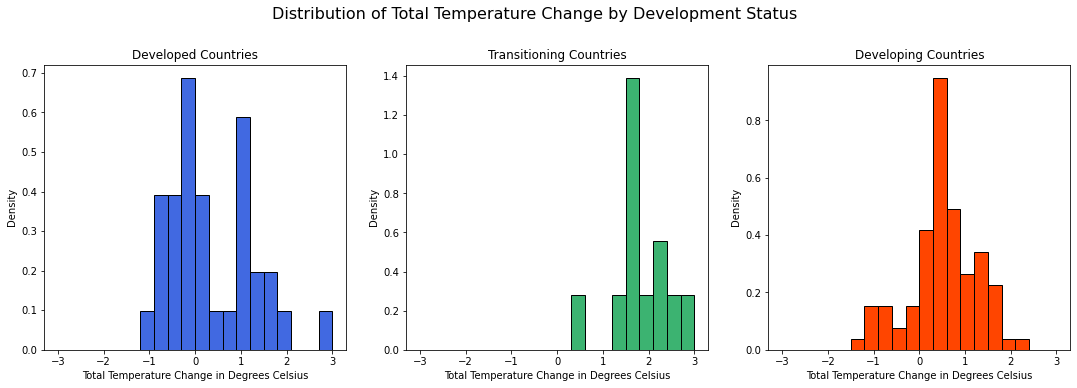

In [18]:
#graphing
development_groups = master_data.groupby('Development Status')
figure, axis = plt.subplots(1, 3)
figure.suptitle("Distribution of Total Temperature Change by Development Status",
                fontsize=16, x = '1.26', y = '1.2') 
axis[0].hist(development_groups.get_group('Developed')['Temperature Change'], bins = 20, density=True, range = [-3,3], color = 'royalblue', ec = 'black')
axis[1].hist(development_groups.get_group('Transitioning')['Temperature Change'],  bins = 20, density=True, color = 'mediumseagreen', ec = 'black', range = [-3,3])
axis[2].hist(development_groups.get_group('Developing')['Temperature Change'],  bins = 20, density=True, color = 'orangered', ec = 'black', range = [-3,3])

axis[0].set_title('Developed Countries')
axis[1].set_title('Transitioning Countries')
axis[2].set_title('Developing Countries')

axis[0].set_xlabel('Total Temperature Change in Degrees Celsius')
axis[1].set_xlabel('Total Temperature Change in Degrees Celsius')
axis[2].set_xlabel('Total Temperature Change in Degrees Celsius')

axis[0].set_ylabel('Density')
axis[1].set_ylabel('Density')
axis[2].set_ylabel('Density')

plt.subplots_adjust(bottom=0.01, right=2.5, top=1)
plt.show()

The figures above illustrate how the development status of countries correlates to the overall temperature change from 1990-2013. From these histograms we can see clearly that transitioning countries and developing countries have a higher concentration of temperature change data above 0 degrees Celsius compared to developed countries. This confirms the hypothesis that countries which are currently developing seem to face higher local temperature increases than already developed countries. One reason this may be the case is that developing countries use cheap energy sources like coal to power their production industries. Alternetivly, developed countries, who already have the infrastructure, can afford to use more expensive reusable energy sources in combination with fossil fuels to minimize GHG emissions and thereby reduce local temperature changes.

### Maps and Interpretations

The maps displayed below will include heat maps of total temperature change and total change in Co2 emissions by country as well as a map of the development status of each country. The goal of these maps is to further explore the relationship between development status and the change in total Co2 emissions from 1990-2013 with the change in average annual temperature from 1990-2013.

In [19]:
#Adding the total change in Co2 Emissions variable to master data
co2_change = []
for country in master_data['Country']:
    T1 = list(dyt.get_group((country, 2013))['co2'])[0]
    T2 = list(dyt.get_group((country, 1990))['co2'])[0]
    co2_change.append(T1 - T2)
master_data['Co2 Emissions Change'] = co2_change
map_data = master_data.copy()

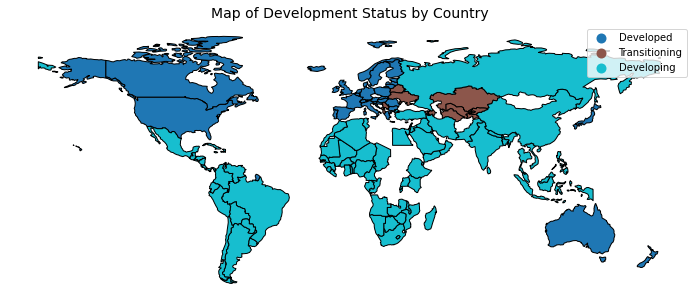

In [20]:
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={"name": "Country"})
world['Country'] = world['Country'].replace(['United States of America'], 'United States')
geo_data = pd.merge(world, map_data, on = 'Country', how='inner')
fig, gax = plt.subplots(figsize = (20,5))
geo_data.plot(
    ax=gax, edgecolor='black', column='Development Status', categorical=True, legend = True, categories = ['Developed', 'Transitioning', 'Developing']
)
plt.title("Map of Development Status by Country", fontsize= 14)
plt.axis('off')
plt.show()

The map above highlights each country in the dataset by their development status to make interpretations easier for the reader when comparing the heat maps plotted below

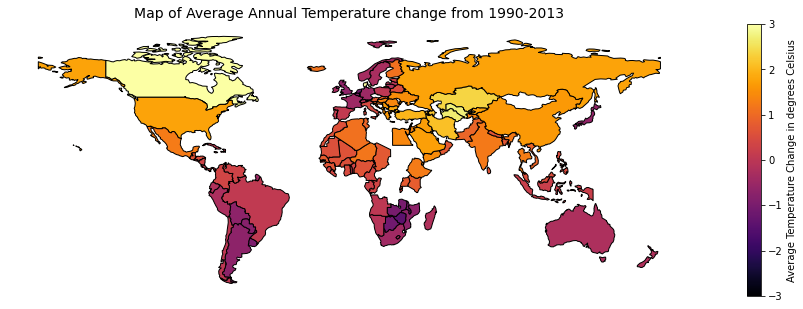

In [21]:
fig, gax = plt.subplots(figsize = (20,5))
geo_data.plot(
    ax=gax, edgecolor='black', column='Temperature Change', legend=True, cmap='inferno',
    vmin=-3, vmax=3, legend_kwds={'label': "Average Temperature Change in degrees Celsius",'shrink': 1}
)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=10)
plt.title("Map of Average Annual Temperature change from 1990-2013", fontsize= 14)
plt.axis('off')
plt.show()

This map shows the total average annual temperature change from 1990-2013 for all of the countries in the dataset. Note that some countries are missing from the dataset and a total of 135 countries are included in these data. Disregarding Canada as an outlier, we can see that countries such as China, India, the United States, and much of the Middle East and Asia have recorded average annual temperatures about 2 degrees higher in 2013 than in 1990. This matches our findings from the analysis of development status which indicated that countries in transition or developing countries should generally have higher average annual temperature increases than developed countries.

Tajikistan, for example, is a country in transition that recorded an average annual temperature increase of closer to 3 degrees Celsius. Conversely, developed countries in western Europe recorded neutral or decreasing temperatures from 1990-2013.

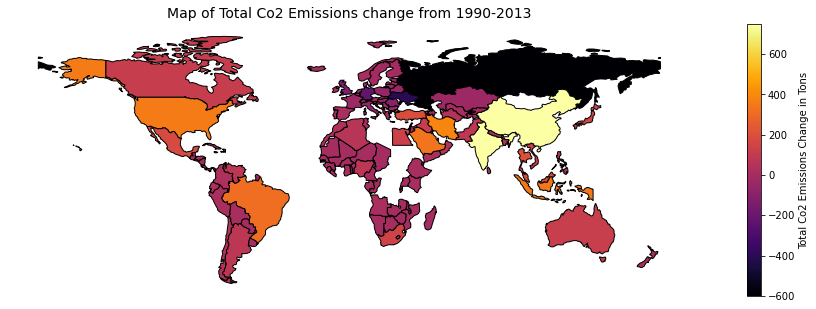

In [22]:
fig, gax = plt.subplots(figsize = (20,5))
geo_data.plot(
    ax=gax, edgecolor='black', column='Co2 Emissions Change', legend=True, cmap='inferno',
    vmin=-600, vmax=750, legend_kwds={'label': "Total Co2 Emissions Change in Tons",'shrink': 1}
)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=10)
plt.title("Map of Total Co2 Emissions change from 1990-2013", fontsize= 14)
plt.axis('off')
plt.show()

This final map shows the change in total Co2 emissions from 1990-2013 for countries in this dataset. A few outliers like Russia, China and India are worth discussing. China and India recorded an increase in Co2 Emissions in the thousands of tons when the mean for Co2 emissions change was approximately an increase of 82 tons. Conversely, Russia recorded a decrease in Co2 emissions of approximately 900 tons. In this case, the large decrease in Co2 Emissions isn't an indication that Russia is necessarily reducing emissions consistently, but a result of sample variance. Russia emits tens of thousands of tons of Co2, so a decrease of 900 tons in 2013 compared to 1990 could be mitigated by an increase in the thousands of tons in 2014. 

Comparing Co2 emissions to development status, we can observe a weaker relationship between development status and total Co2 emission change than development status and average annual temperature change. The expectation based on the hypothesis was that the change in overall Co2 emissions and average annual temperature would have a negative correlation with development status. This means that the more developed a country becomes, the less their average annual temperature would change and the less Co2 they would emit. Based on the maps above, it's possible that average temperature has a weak negative correlation with development status, but the correlation between Co2 emission change and development status is much weaker than average annual temperature change.

## Project 3

### Potential Data to Scrape

So far, the data in this study suggests that developing countries, who emit lots of greenhouse gasses and are experiencing rapid GDP growth, are more likely to experience higher annual average temperature changes. Other than GHG emissions, which are caused by a combination of manufacturing, agriculutre, energy production and more (Sources of Greenhouse Gas Emissions), development status and GDP have been used as proxies for a countries overall industry. To gain a better understanding of how a countries industrialization level impacts their local average annual temeprature changes, it is useful to add data on a countries manufacturing output.

These data can be scraped from the Brookings Global manufacturing scorecard 2018 (West & Lansang, 2022) and will be merged with the annual dataset so that the countries and years in the new dataset are added to "data_annual" without deleting unmatched observations. The table from Brookings that will be merged contains data on global manufacturing output rankings for 19 countries from 1970 - 2015, and will enable research to be conducted on the relationship between a countries manufacturing output ranking and their average temperatures.

### Potential Challenges

The data on manufacturing output ranking by country by year is somewhat similar in shape to the annual dataset in this paper. The only challenge will be to combine the country and year from the new dataset in columns rather than having country in the top row. Also, the new dataset contains substantially less observations, so merging the two datasets in such a way that no data is dropped from the original dataset and visualization is possible without being skewed by missing data may pose a challenge.

### Scraping Data from a Website

In [23]:
import requests
from bs4 import BeautifulSoup
url = "https://www.brookings.edu/research/global-manufacturing-scorecard-how-the-us-compares-to-18-other-nations/"
response = requests.get(url)
soup = BeautifulSoup(response.content)

In [24]:
data_table = soup.find_all('table')[3]
all_values = data_table.find_all('tr')
rankings = pd.DataFrame(columns = ['Year', 
                                   'United States', 'Russia', 'Japan', 'Germany', 'China',
                                  'United Kingdom', 'France', 'Italy', 'Canada', 'Spain']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values[1:-1]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    Year = values[0].text
    US = values[1].text
    Russia = values[2].text
    Japan = values[3].text
    Germany = values[4].text
    China = values[5].text
    UK = values[6].text
    France = values[7].text
    Italy = values[8].text
    Canada = values[9].text
    Spain = values[10].text
    
    rankings.loc[ix] = [Year, US, Russia, Japan, Germany, China, UK, France, Italy, Canada, Spain] # Store it in the dataframe as a row
    ix += 1

In [25]:
data_table1 = soup.find_all('table')[4]
all_values1 = data_table1.find_all('tr')
rankings1 = pd.DataFrame(columns = ['Year', 
                                   'Taiwan', 'India', 'Brazil', 'Mexico', 'Switzerland',
                                  'Turkey', 'South Korea', 'Thailand', 'Indonesia']) # Create an empty dataframe
ix = 0 # Initialise index to zero

for row in all_values1[1:-1]:
    values = row.find_all('td') # Extract all elements with tag <td>
    # Pick only the text part from the <td> tag
    Year = values[0].text
    Taiwan = values[1].text
    India = values[2].text
    Brazil = values[3].text
    Mexico = values[4].text
    Switzerland = values[5].text
    Turkey = values[6].text
    SouthK = values[7].text
    Thailand = values[8].text
    Indonesia = values[9].text
    
    rankings1.loc[ix] = [Year, Taiwan, India, Brazil, Mexico, Switzerland, Turkey, SouthK, Thailand, Indonesia] # Store it in the dataframe as a row
    ix += 1

### Merging the Scraped Dataset

In [26]:
#putting scraped data in mergeable format
new_data = pd.merge(rankings, rankings1, on='Year')
countries = pd.DataFrame({'Country': new_data.columns[1::]})
yrs = [1970,1980,1990,2000, 2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015]
sd = {}
c = []
y = []
for country in countries['Country']:
    for i in range(15):
        c.append(country)
        y.append(yrs[i])
ranking = []
for column in new_data.columns[1::]:
    for r in list(new_data[column]):
        ranking.append(int(r))
        
scraped_data = pd.DataFrame({'Year': y, 'Country': c, 'Ranking': ranking})


In [27]:
#Merging with annual data
new_master = pd.merge(data_annual, scraped_data, on = ['Year', 'Country'], how='left')

### Visualizing the Scraped Dataset

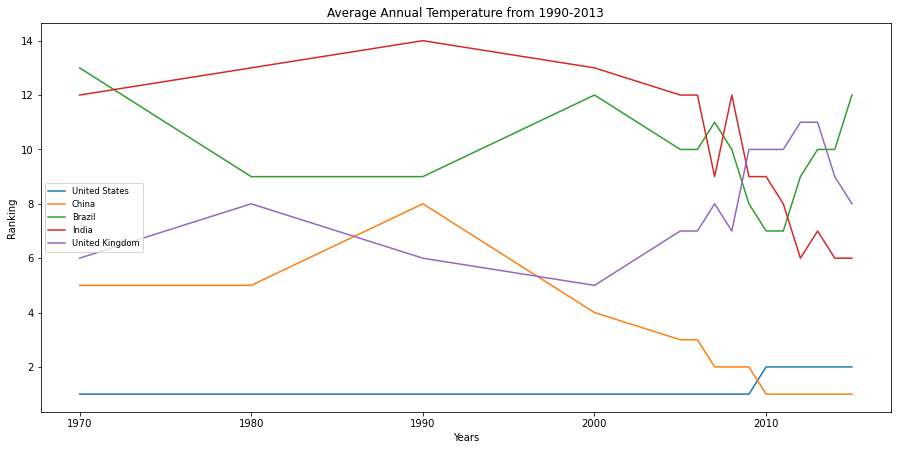

In [28]:
#Countries
C = ['United States', 'China', 'Brazil', 'India', 'United Kingdom']
fig, gax = plt.subplots(figsize = (8,6))
for country in C:
    plt.plot(scraped_data['Year'].unique(),scraped_data[scraped_data['Country'] == country]['Ranking'].fillna(method ='ffill'), label = country)
# set axis lables
plt.xlabel("Years")
plt.ylabel("Ranking")
# set chart title
plt.title("Average Annual Temperature from 1990-2013")
plt.legend(loc = 'best', fontsize = 'small')
plt.subplots_adjust(bottom=0.1, right=1.6, top=1)
plt.show()

This figure shows how these 5 countries have changed in terms of their manufacturing output ranking over a 45 year period. Note that the smoothness in the earlier years displayed in this graph are because observations in the data occur once every 10 years from 1970-2000 and once a year from 2005-2015. 

We can see from this graph that China has quickly become the nation with the worlds highest manufacturing output in 2010, surpassing the United States. India has also steadily climbed up the rankings while the United Kingdom and Brazil have somewhat reduced their manufacturing output compared to the leaders. These findings are consistent with earlier data showing how China and India and quickly growing economies in developing nations that are massively increasing their carbon emissions. If manufacturing output is linked to carbon emissions, GDP and average annual temperature, we should find a negative correlation between these variables and manufacturing output ranking when running a regression.

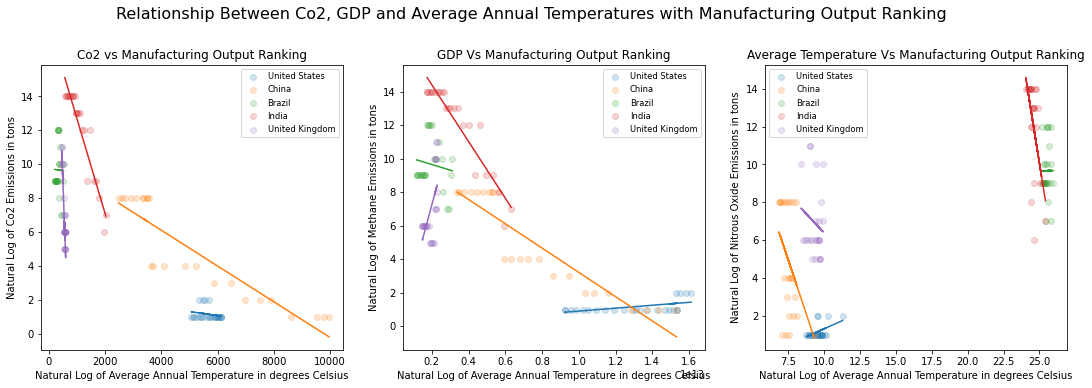

In [29]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 3)
figure.suptitle("Relationship Between Co2, GDP and Average Annual Temperatures with Manufacturing Output Ranking",
                fontsize=16, x = '1.26', y = '1.2') 
# For Co2
for country in C:
    x = (new_master[new_master['Country'] == country]['co2'])
    y = (new_master[new_master['Country'] == country]['Ranking'].fillna(method ='ffill'))
    axis[0].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[0].plot(x, m*x+b)
# For GDP
for country in C:
    x = (new_master[new_master['Country'] == country]['gdp'])
    y = (new_master[new_master['Country'] == country]['Ranking'].fillna(method ='ffill'))
    axis[1].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[1].plot(x, m*x+b)
# For Average Temperature
for country in C:
    x = (new_master[new_master['Country'] == country]['Avg_Annual_Temp'])
    y = (new_master[new_master['Country'] == country]['Ranking'].fillna(method ='ffill'))
    axis[2].scatter(x,y, label = country, alpha = 0.2)
    m, b = np.polyfit(x, y, 1)
    axis[2].plot(x, m*x+b)

    
axis[0].set_title('Co2 vs Manufacturing Output Ranking')
axis[1].set_title('GDP Vs Manufacturing Output Ranking')
axis[2].set_title('Average Temperature Vs Manufacturing Output Ranking')

axis[0].legend(loc = 'best', fontsize = 'small')
axis[1].legend(loc = 'best', fontsize = 'small')
axis[2].legend(loc = 'best', fontsize = 'small')

axis[0].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[1].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')
axis[2].set_xlabel('Natural Log of Average Annual Temperature in degrees Celsius')

axis[0].set_ylabel('Natural Log of Co2 Emissions in tons')
axis[1].set_ylabel('Natural Log of Methane Emissions in tons')
axis[2].set_ylabel('Natural Log of Nitrous Oxide Emissions in tons')

plt.subplots_adjust(bottom=0.01, right=2.5, top=1)
plt.show()

The three graphs above demonstrate the relationship between the new variable, manaufacturing output ranking, with three important variables from earlier in the study, Co2, GDP and Average Annual Temperature. 

The relationship between Co2 and GDP with manufacturing output have a moderately strong negative correlation with manufacturing output ranking in China and India, but no relevant relationship in the other countries plotted. This could be because manufacturing ranking is a relative variable, and not a measure of gross manufacturing output. While Brazil and the United Kingdom may have increased their manufacturing output in conjunction with their co2 emissions and GDP, they increased this output by less than the other countries in the ranking list, therby decreasing their ranking and showing (in some cases) even a positive correlation with co2 and GDP. 

When it comes to Average Temperature, again, China and India are the only countries with a meaningful relationship between manufacturing output ranking and Average Temperature. In these two cases, a weak negative correlation between average annual temeprature and manufacturing ouput ranking can be observed, indicating a connection between increasing manufacturing output and rising local temparatures.

Overall, the manufacturing output ranking variable is usefull in the context of countries which clearly increases their manufacturing output by more than the other ranked countries, but less useful for countries that fell in the rankings without data on gross manufacturing output. 

In the context of countries that increases their manufacturing output ranking, we can see that both GDP and Co2 are good proxies for manufacturing output because of the strength of their correlations with manufacturing output ranking. For average annual temeprature, there is a weak negative correlation with manufacturing output ranking. While there may be endogenity bias for the average annual temperature relationship, knowing that GDP and Co2 are good proxies for a countries level of industrialization strengthens the interpretations derived from studying these variables in the context of climate change.

### Adding a New Dataset

### Conclusion

In summary, this study investigated the relationship between emissions, GDP and development status on a country's local temperature change. The findings revealed weak positive correlations between Co2 and GDP with average annual temperatures in all countries. Among the six representative countries studied, China, India and Saudi Arabia had the highest correlation between the percent increase in emissions and GDP with the percent increase in average annual temperatures. Moreover, Co2 emissions had the greatest impact on average annual temperatures, and coal contributed the most to total Co2 emissions. The results also indicated that development status plays a role in a country's local temperature change, with transitioning and developing countries exhibiting more highly concentrated positive temperature changes than developed countries. The study supports the evidence for climate change and emphasizes the role of a country's own actions in their local temperature change. Lastly, reducing emissions and local average annual temperatures may be achieved by transitioning away from burning coal, especially in transitioning and developing economies.

## Bibliography

Christopher L. Weber a, et al. “The Contribution of Chinese Exports to Climate Change.” Energy Policy, Elsevier, 21 July 2008, https://www.sciencedirect.com/science/article/pii/S0301421508002905. 

Earth Science Communications Team at  NASA's Jet Propulsion Laboratory. “The Causes of Climate Change.” NASA, NASA, 21 Feb.      2023, https://climate.nasa.gov/causes/. 

Earth, Berkeley. “Climate Change: Earth Surface Temperature Data.” Kaggle, 1 May 2017,                                         https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data. 

Ritchie, Hannah, et al. “CO2 Emissions.” Our World in Data, 11 May 2020, https://ourworldindata.org/co2-emissions. 

Rosa, Eugene A., and Thomas Dietz. “Human Drivers of National Greenhouse-Gas Emissions.” Nature News, Nature Publishing Group,  10 June 2012, https://www.nature.com/articles/nclimate1506. 

Knight, Kyle W., and Juliet B. Schor. “Economic Growth and Climate Change: A Cross-National Analysis of Territorial and          Consumption-Based Carbon Emissions in High-Income Countries.” MDPI, Multidisciplinary Digital Publishing Institute, 10 June     2014, https://www.mdpi.com/2071-1050/6/6/3722. 

Jorgenson, Dale W., et al. “Raising the Speed Limit: U.S. Economic Growth in the Information Age.” Brookings Papers on Economic  Activity, vol. 2000, no. 1, 2000, pp. 125–235. JSTOR, http://www.jstor.org/stable/2667350. Accessed 25 Feb. 2023.

WESP. “Country Classification - United Nations.” World Economic Situation - United Nations, 2020, https://www.un.org/en/development/desa/policy/wesp/wesp_current/2014wesp_country_classification.pdf. 

Environmental Protection Agency. (n.d.). Sources of Greenhouse Gas Emissions. EPA. Retrieved March 14, 2023, from https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions 

West, D. M., &amp; Lansang, C. (2022, March 9). Global Manufacturing Scorecard: How the US compares to 18 other nations. Brookings. Retrieved March 14, 2023, from https://www.brookings.edu/research/global-manufacturing-scorecard-how-the-us-compares-to-18-other-nations/ 